In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.stats import kruskal

In [2]:
nonurban_train_df = pd.read_csv("nonurban_train_df.csv")

In [3]:
nonurban_train_df.head()

,Name,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue,Review Quality Score,Meal Price Category,Cluster
0,Restaurant 1649,Rural,Japanese,49,3259,34243,6,109,4.2,5.5,Yes,24,11,794650.87,810.583476,High,Nonurban
1,Restaurant 1052,Suburban,Indian,55,2662,34744,4,826,1.8,4.6,Yes,27,24,421854.52,500.508350,Medium,Nonurban
2,Restaurant 2520,Suburban,Italian,60,1515,19829,13,207,8.5,3.5,Yes,44,51,659678.50,699.115449,Medium,Nonurban
3,Restaurant 1727,Rural,Italian,35,1778,24218,1,234,5.6,5.8,No,0,7,358587.50,576.446525,Medium,Nonurban
4,Restaurant 2717,Rural,Japanese,30,2966,32413,2,792,6.8,6.5,No,19,23,478350.21,1075.677952,High,Nonurban


In [4]:
nonurban_train_df.shape

(3904, 17)

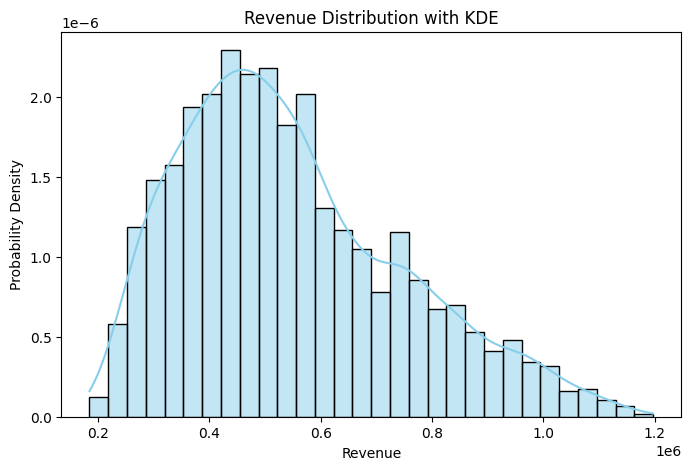

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(data=nonurban_train_df, x='Revenue', kde=True, bins=30, color='skyblue',stat='density')

plt.title('Revenue Distribution with KDE')
plt.xlabel('Revenue')
plt.ylabel('Probability Density')
plt.show()

In [6]:
nonurban_train_df['log_revenue'] = np.log(nonurban_train_df['Revenue'])  # or np.log1p if any very small values


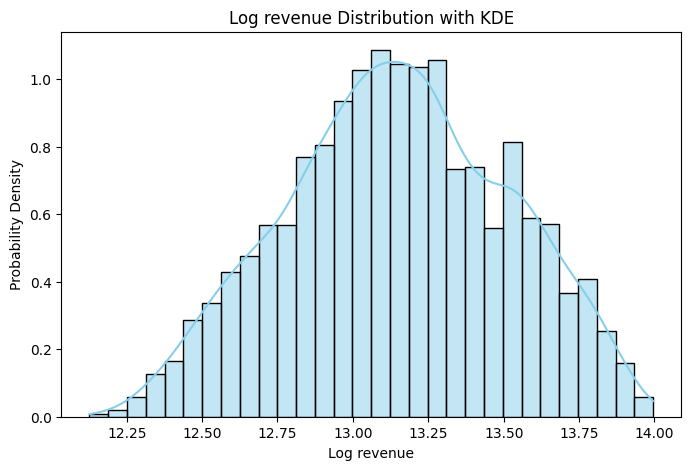

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(data=nonurban_train_df, x='log_revenue', kde=True, bins=30, color='skyblue',stat='density')

plt.title('Log revenue Distribution with KDE')
plt.xlabel('Log revenue')
plt.ylabel('Probability Density')
plt.show()

In [8]:
stat, p = shapiro(nonurban_train_df['log_revenue'])
print(f"Shapiro-Wilk test statistic = {stat:.4f}, p-value = {p:.4f}")


Shapiro-Wilk test statistic = 0.9919, p-value = 0.0000


In [9]:
nonurban_train_df['revenue_boxcox'], fitted_lambda = boxcox(nonurban_train_df['Revenue'])
print(f"Lambda used for Box-Cox: {fitted_lambda}")


Lambda used for Box-Cox: 0.06493034505772827


In [10]:
stat, p = shapiro(nonurban_train_df['revenue_boxcox'])
print(f"Shapiro-Wilk test statistic = {stat:.4f}, p-value = {p:.4f}")


Shapiro-Wilk test statistic = 0.9920, p-value = 0.0000


## Revenue is not normal Use log transformation

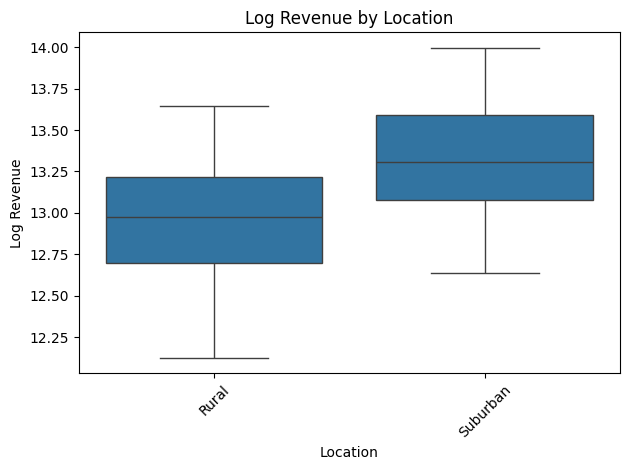

In [11]:
sns.boxplot(data=nonurban_train_df, x='Location', y='log_revenue')

# Optional formatting
plt.title('Log Revenue by Location')
plt.xlabel('Location')
plt.ylabel('Log Revenue')
plt.xticks(rotation=45)  # rotate labels if locations have long names
plt.tight_layout()
plt.show()

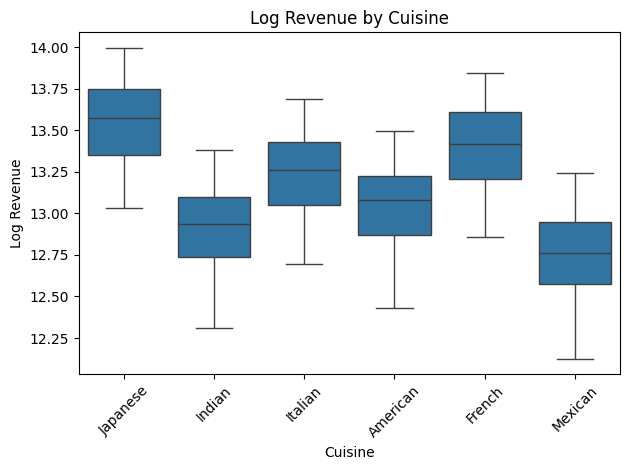

In [12]:
sns.boxplot(data=nonurban_train_df, x='Cuisine', y='log_revenue')

# Optional formatting
plt.title('Log Revenue by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Log Revenue')
plt.xticks(rotation=45)  # rotate labels if locations have long names
plt.tight_layout()
plt.show()

In [13]:
groups = [group['log_revenue'].values for name, group in nonurban_train_df.groupby('Cuisine')]

stat, p = kruskal(*groups)
print(f"Kruskal-Wallis statistic = {stat:.4f}, p-value = {p:.4f}")

Kruskal-Wallis statistic = 2225.6188, p-value = 0.0000


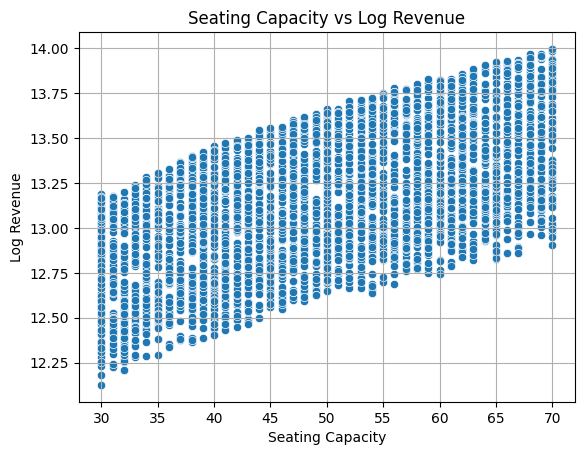

In [14]:
sns.scatterplot(data=nonurban_train_df, x='Seating Capacity', y='log_revenue')

# Optional enhancements
plt.title('Seating Capacity vs Log Revenue')
plt.xlabel('Seating Capacity')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

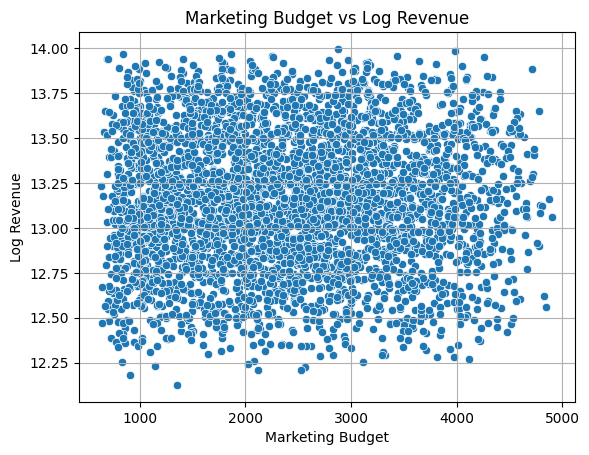

In [15]:
sns.scatterplot(data=nonurban_train_df, x='Marketing Budget', y='log_revenue')

# Optional enhancements
plt.title('Marketing Budget vs Log Revenue')
plt.xlabel('Marketing Budget')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

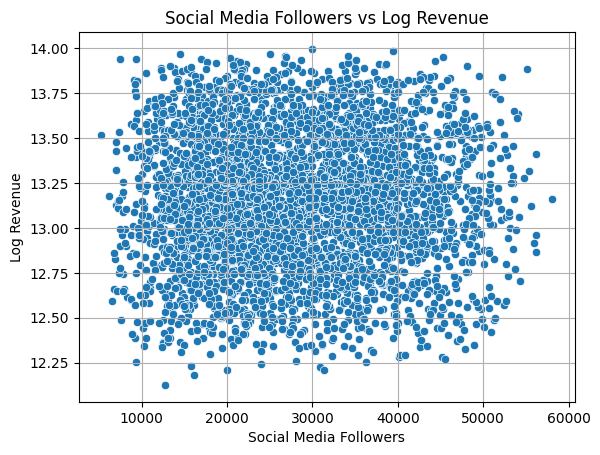

In [16]:
sns.scatterplot(data=nonurban_train_df, x='Social Media Followers', y='log_revenue')

# Optional enhancements
plt.title('Social Media Followers vs Log Revenue')
plt.xlabel('Social Media Followers')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

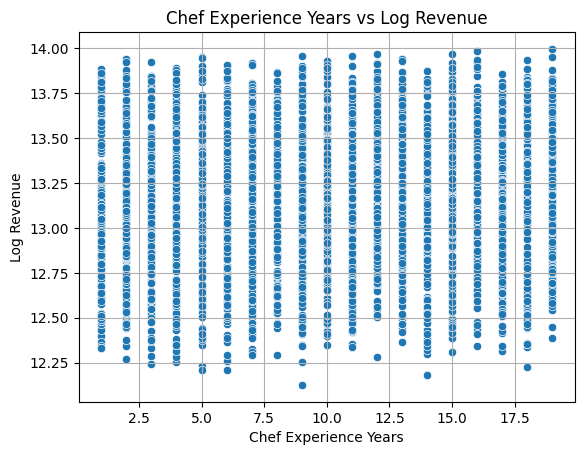

In [17]:
sns.scatterplot(data=nonurban_train_df, x='Chef Experience Years', y='log_revenue')

# Optional enhancements
plt.title('Chef Experience Years vs Log Revenue')
plt.xlabel('Chef Experience Years')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

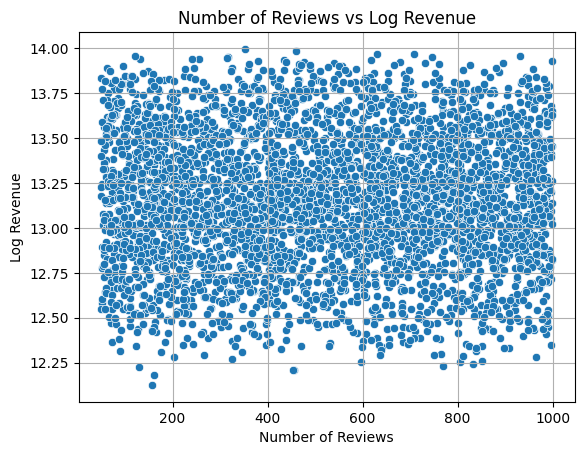

In [18]:
sns.scatterplot(data=nonurban_train_df, x='Number of Reviews', y='log_revenue')

# Optional enhancements
plt.title('Number of Reviews vs Log Revenue')
plt.xlabel('Number of Reviews')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

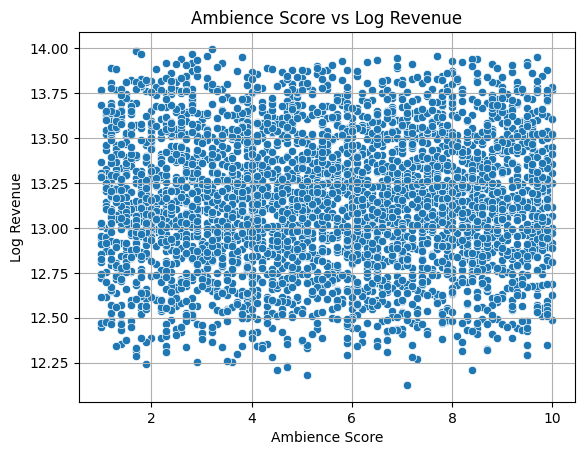

In [19]:
sns.scatterplot(data=nonurban_train_df, x='Ambience Score', y='log_revenue')

# Optional enhancements
plt.title('Ambience Score vs Log Revenue')
plt.xlabel('Ambience Score')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

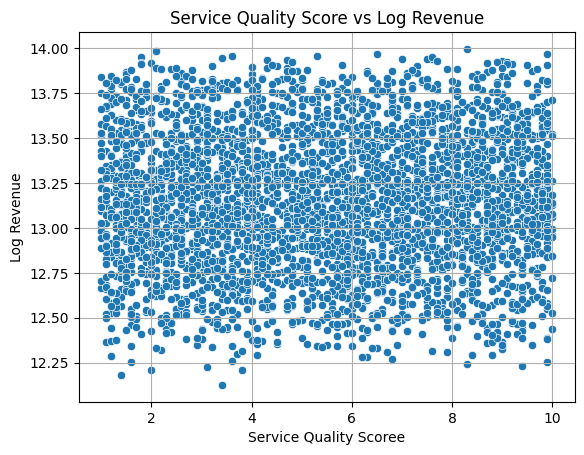

In [20]:
sns.scatterplot(data=nonurban_train_df, x='Service Quality Score', y='log_revenue')

# Optional enhancements
plt.title('Service Quality Score vs Log Revenue')
plt.xlabel('Service Quality Scoree')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

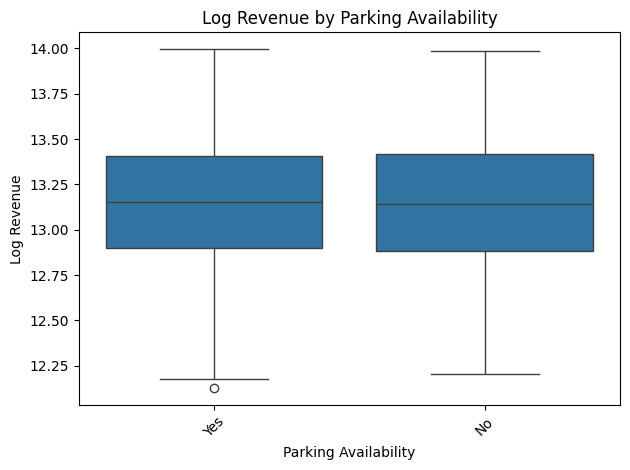

In [21]:
sns.boxplot(data=nonurban_train_df, x='Parking Availability', y='log_revenue')

# Optional formatting
plt.title('Log Revenue by Parking Availability')
plt.xlabel('Parking Availability')
plt.ylabel('Log Revenue')
plt.xticks(rotation=45)  # rotate labels if locations have long names
plt.tight_layout()
plt.show()

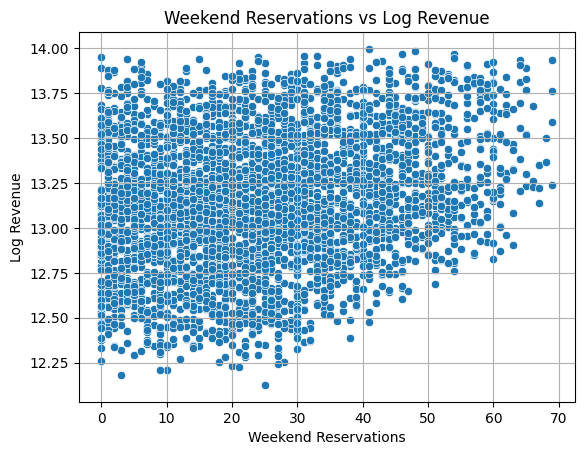

In [22]:
sns.scatterplot(data=nonurban_train_df, x='Weekend Reservations', y='log_revenue')

# Optional enhancements
plt.title('Weekend Reservations vs Log Revenue')
plt.xlabel('Weekend Reservations')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

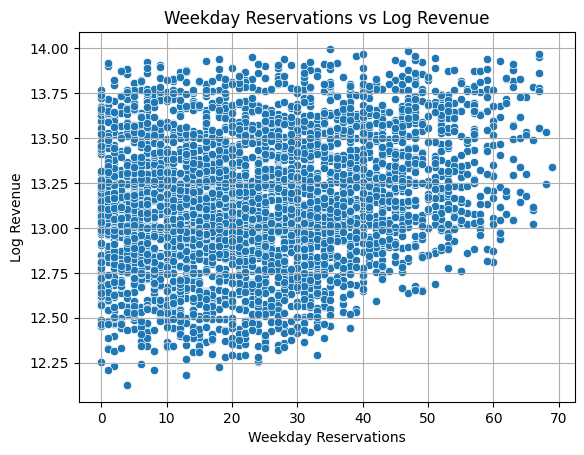

In [23]:
sns.scatterplot(data=nonurban_train_df, x='Weekday Reservations', y='log_revenue')

# Optional enhancements
plt.title('Weekday Reservations vs Log Revenue')
plt.xlabel('Weekday Reservations')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

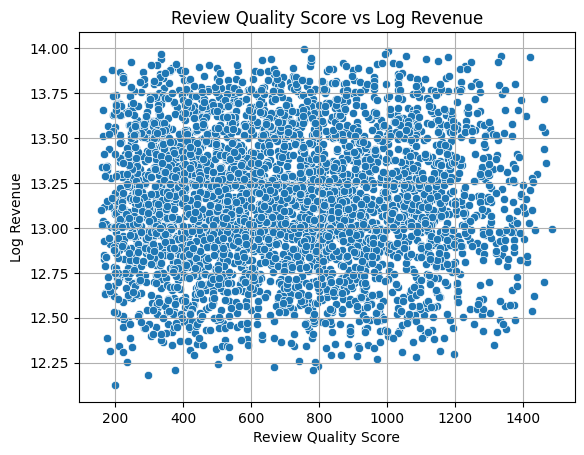

In [24]:
sns.scatterplot(data=nonurban_train_df, x='Review Quality Score', y='log_revenue')

# Optional enhancements
plt.title('Review Quality Score vs Log Revenue')
plt.xlabel('Review Quality Score')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

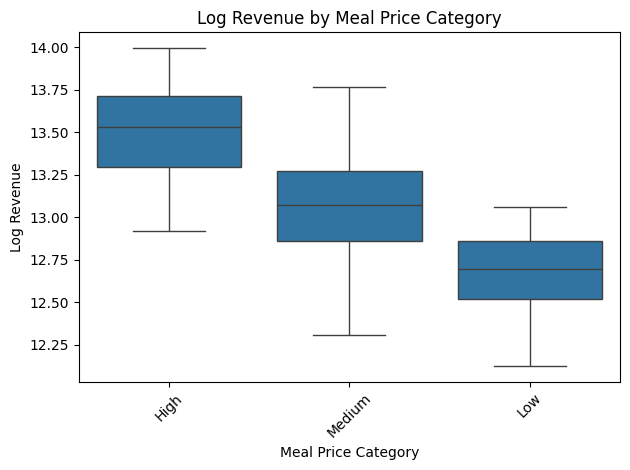

In [25]:
sns.boxplot(data=nonurban_train_df, x='Meal Price Category', y='log_revenue')

# Optional formatting
plt.title('Log Revenue by Meal Price Category')
plt.xlabel('Meal Price Category')
plt.ylabel('Log Revenue')
plt.xticks(rotation=45)  # rotate labels if locations have long names
plt.tight_layout()
plt.show()

In [26]:
groups = [group['log_revenue'].values for name, group in nonurban_train_df.groupby('Meal Price Category')]

stat, p = kruskal(*groups)
print(f"Kruskal-Wallis statistic = {stat:.4f}, p-value = {p:.4f}")

Kruskal-Wallis statistic = 1576.0592, p-value = 0.0000


In [27]:
nonurban_train_df.columns

Index(['Name', 'Location', 'Cuisine', 'Seating Capacity', 'Marketing Budget',
       'Social Media Followers', 'Chef Experience Years', 'Number of Reviews',
       'Ambience Score', 'Service Quality Score', 'Parking Availability',
       'Weekend Reservations', 'Weekday Reservations', 'Revenue',
       'Review Quality Score', 'Meal Price Category', 'Cluster', 'log_revenue',
       'revenue_boxcox'],
      dtype='object')

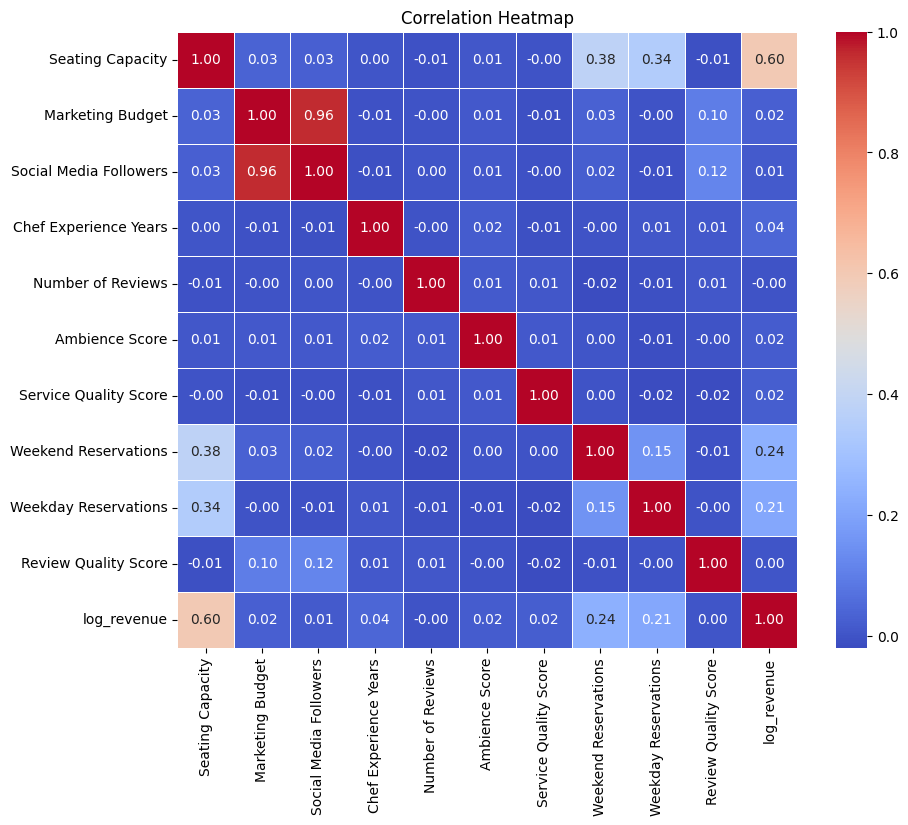

In [28]:
# Correct way to select multiple columns
numeric_df = nonurban_train_df[['Seating Capacity', 'Marketing Budget', 'Social Media Followers', 
                                 'Chef Experience Years', 'Number of Reviews', 'Ambience Score', 
                                 'Service Quality Score', 'Weekend Reservations', 
                                 'Weekday Reservations', 'Review Quality Score', 'log_revenue']]

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Set up the figure and axes for the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Add a title to the heatmap
plt.title("Correlation Heatmap")

# Display the plot
plt.show()
